# WebScraping


In [4]:
import pandas as pd
import numpy as np
import os
import requests
from bs4 import BeautifulSoup


In [5]:
reviews = []
stars = []
date = []
country = []



In [6]:
for i in range(1, 365):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")
    
    soup = BeautifulSoup(page.content, "html.parser")
    
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)
    
    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")
            
    #date
    for item in soup.find_all("time"):
        date.append(item.text)
        
    #country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

Error on page 31
Error on page 32
Error on page 33
Error on page 35
Error on page 35


In [7]:
len(reviews)

3644

In [8]:
len(country)

3644

In [9]:
len(stars)

4008

In [10]:
len(date)

3644

#### Limiting the row data to avoid error since length of stars was not equal to length of other columns

In [11]:
stars = stars[:3644]

### DataFraming

In [12]:
df = pd.DataFrame({'country':country,'stars':stars,'date':date,'reviews':reviews})

In [13]:
df.head


<bound method NDFrame.head of              country                          stars                date  \
0            Germany  \n\t\t\t\t\t\t\t\t\t\t\t\t\t5  6th September 2023   
1     United Kingdom                              1  4th September 2023   
2            Iceland                              1  4th September 2023   
3            Iceland                              8  4th September 2023   
4     United Kingdom                              8  4th September 2023   
...              ...                            ...                 ...   
3639  United Kingdom                              8    29th August 2012   
3640  United Kingdom                              2    28th August 2012   
3641  United Kingdom                              7   12th October 2011   
3642   United States                              1   11th October 2011   
3643  United Kingdom                             10    9th October 2011   

                                                reviews  
0     ✅ Tri

### Getting Current Working Directory and saving the entire df as csv

In [21]:
cwd = os.getcwd()
df.to_csv(cwd+ "/BritishAirways.csv")

# DataCleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
import re
from datetime import datetime


In [3]:
cwd = os.getcwd()
df = pd.read_csv(r'E:\CODE\PYTHON\Jupyter\Forage BA\csv\BritishAirways.csv',index_col=0)

In [4]:
df.head()

,country,stars,date,reviews
0,Germany,5.0,6th September 2023,✅ Trip Verified | 4/4 flights we booked this ...
1,United Kingdom,1.0,4th September 2023,✅ Trip Verified | British Airways has a total...
2,Iceland,1.0,4th September 2023,"✅ Trip Verified | London Heathrow to Keflavik,..."
3,Iceland,8.0,4th September 2023,✅ Trip Verified | Mumbai to London Heathrow in...
4,United Kingdom,8.0,4th September 2023,✅ Trip Verified | Care and support shocking. ...


In [5]:
df['verified']=df.reviews.str.contains('Trip Verified')

In [6]:
df['verified']

0        True
1        True
2        True
3        True
4        True
        ...  
3639    False
3640    False
3641    False
3642    False
3643    False
Name: verified, Length: 3644, dtype: bool

In [7]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()



reviews_data = df.reviews.str.strip("✅ Trip Verified |")

corpus=[]

for rev in reviews_data:
    rev=re.sub('[^a-zA-Z]',' ',rev)
    rev=rev.lower()
    rev=rev.split()
    rev=[lemma.lemmatize(word)for word in rev if word not in set(stopwords.words('english'))]
    rev = " ".join(rev)
    corpus.append(rev)

In [8]:
df['corpus']=corpus


In [9]:
df.head()

,country,stars,date,reviews,verified,corpus
0,Germany,5.0,6th September 2023,✅ Trip Verified | 4/4 flights we booked this ...,True,flight booked holiday delayed hour wifi availa...
1,United Kingdom,1.0,4th September 2023,✅ Trip Verified | British Airways has a total...,True,british airway total lack respect customer boo...
2,Iceland,1.0,4th September 2023,"✅ Trip Verified | London Heathrow to Keflavik,...",True,london heathrow keflavik iceland business clas...
3,Iceland,8.0,4th September 2023,✅ Trip Verified | Mumbai to London Heathrow in...,True,mumbai london heathrow business class ageing b...
4,United Kingdom,8.0,4th September 2023,✅ Trip Verified | Care and support shocking. ...,True,care support shocking written previously loyal...


In [10]:
df.dtypes

country      object
stars       float64
date         object
reviews      object
verified       bool
corpus       object
dtype: object

In [11]:
df.date.head()

0    6th September 2023
1    4th September 2023
2    4th September 2023
3    4th September 2023
4    4th September 2023
Name: date, dtype: object

In [12]:
df.stars.value_counts()

stars
1.0     834
2.0     418
3.0     398
8.0     358
10.0    322
7.0     308
9.0     307
5.0     265
4.0     243
6.0     186
Name: count, dtype: int64

In [13]:
result=df.country.value_counts()
with pd.option_context('display.max_rows', None):
    print(result)

country
United Kingdom           2293
United States             402
Australia                 158
Canada                    114
Germany                    62
Ireland                    39
South Africa               39
Switzerland                37
Netherlands                34
Spain                      29
France                     27
Singapore                  27
Belgium                    25
United Arab Emirates       23
Thailand                   23
Italy                      20
Sweden                     20
India                      19
China                      18
Hong Kong                  16
Greece                     15
Malaysia                   14
Portugal                   13
Denmark                    12
Austria                    11
New Zealand                11
Saudi Arabia                9
Mexico                      8
Poland                      8
Ghana                       7
Qatar                       7
Cyprus                      6
Argentina                   6
No

In [14]:
df.isnull().value_counts()


country  stars  date   reviews  verified  corpus
False    False  False  False    False     False     3637
         True   False  False    False     False        5
True     False  False  False    False     False        2
Name: count, dtype: int64

In [15]:
df.country.isnull().value_counts()


country
False    3642
True        2
Name: count, dtype: int64

In [16]:
df.drop(df[df.country.isnull() == True].index, axis=0, inplace=True)


In [17]:
df.shape


(3642, 6)

In [18]:
df.reset_index(drop=True)


,country,stars,date,reviews,verified,corpus
0,Germany,5.0,6th September 2023,✅ Trip Verified | 4/4 flights we booked this ...,True,flight booked holiday delayed hour wifi availa...
1,United Kingdom,1.0,4th September 2023,✅ Trip Verified | British Airways has a total...,True,british airway total lack respect customer boo...
2,Iceland,1.0,4th September 2023,"✅ Trip Verified | London Heathrow to Keflavik,...",True,london heathrow keflavik iceland business clas...
3,Iceland,8.0,4th September 2023,✅ Trip Verified | Mumbai to London Heathrow in...,True,mumbai london heathrow business class ageing b...
4,United Kingdom,8.0,4th September 2023,✅ Trip Verified | Care and support shocking. ...,True,care support shocking written previously loyal...
...,...,...,...,...,...,...
3637,United Kingdom,8.0,29th August 2012,Flight from Heathrow to Toronto. Booked emerge...,False,flight heathrow toronto booked emergency exit ...
3638,United Kingdom,2.0,28th August 2012,LHR to HAM. Purser addresses all club passenge...,False,lhr ham purser address club passenger name boa...
3639,United Kingdom,7.0,12th October 2011,My son who had worked for British Airways urge...,False,son worked british airway urged fly british ai...
3640,United States,1.0,11th October 2011,London City-New York JFK via Shannon on A318 b...,False,london city new york jfk via shannon really ni...


In [19]:
df.to_csv(cwd + "/C_BA_reviews1.csv")


In [20]:
# Assuming you have a DataFrame named 'df' and want to count 'food' occurrences in the 'reviews' column
word_to_count = 'safety'
count_food = df['reviews'].str.count(fr'\b{word_to_count}\b').sum()

# Print the total count
print(f'Total occurrences of "{word_to_count}": {count_food}')


Total occurrences of "safety": 54


In [21]:
# Assuming you have a DataFrame named 'df' and want to count occurrences of '1.0' in the 'stars' column
word_to_count = 10.0  # Note that we use a numerical value here

count_stars = (df['stars'] == word_to_count).sum()

# Print the total count
print(f'Total occurrences of {word_to_count}: {count_stars}')

Total occurrences of 10.0: 322


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'staff'),
  Text(10, 0, 'business'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'return'),
  Text(16, 0, 'lounge'),
  Text(17, 0, 'club'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'experience')])

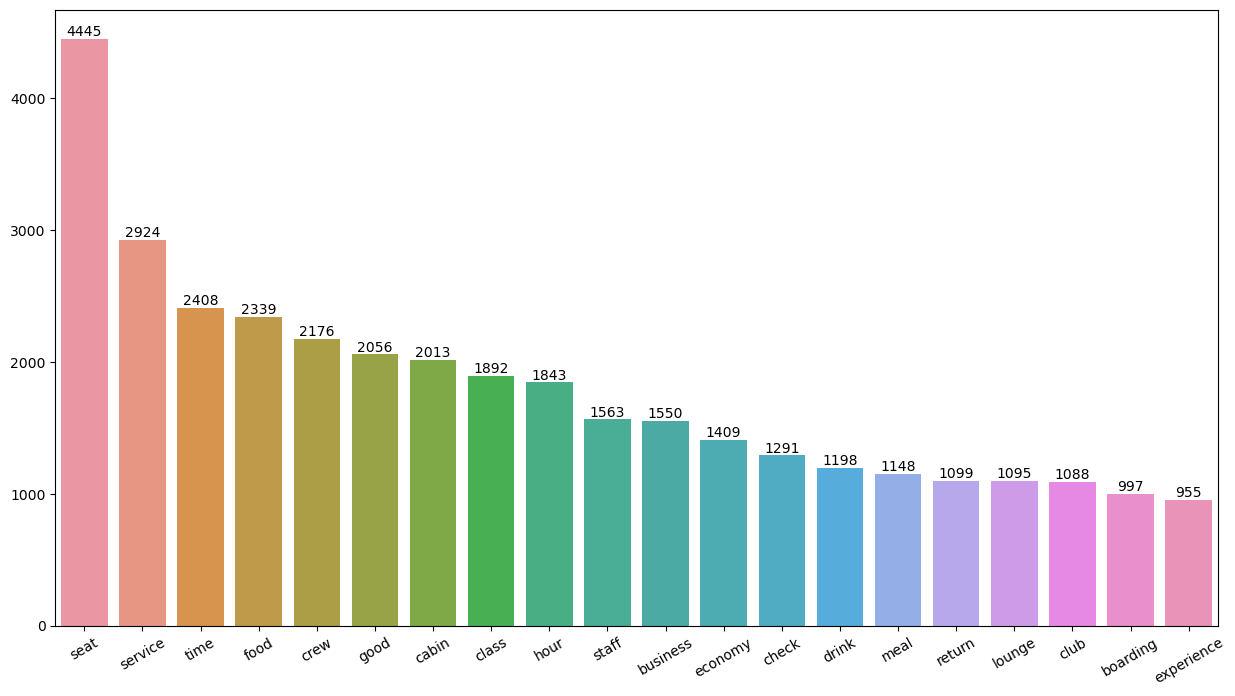

In [22]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
reviews = " ".join(df.corpus)
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))


## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

<Figure size 8000x5000 with 0 Axes>

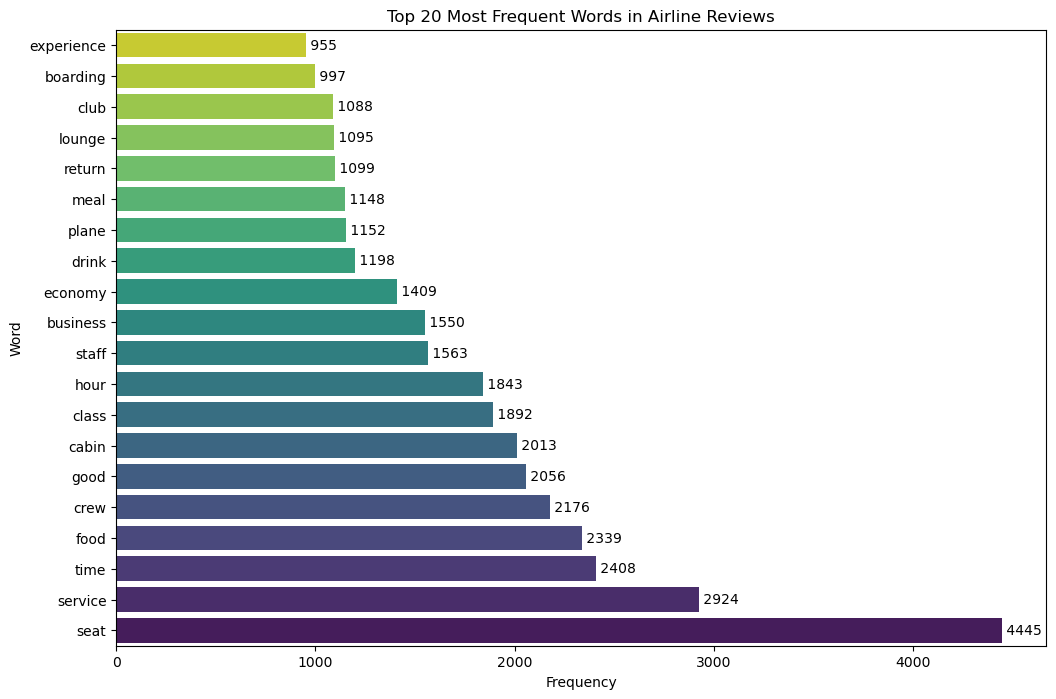

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from nltk import FreqDist
from nltk.corpus import stopwords

# Assuming 'df.corpus' contains your text data

# Join and split the text into words
reviews = " ".join(df.corpus)
words = reviews.split()

# Remove stopwords
stop_words = set(stopwords.words("english"))
custom_stopwords = set(['flight', 'ba', "passenger", "u", "london", "airway", "british", "airline", "heathrow","get", "even", "first","back", "one", "check", "first" "plane", "lhr", "review", "would"])
filtered_words = [word for word in words if word.lower() not in stop_words and word.lower() not in custom_stopwords]

# Calculate word frequencies
word_freq = FreqDist(filtered_words)
top_words = word_freq.most_common(20)

#setting up imag quality
# Set a larger figure size and higher DPI for HD
plt.figure(figsize=(16, 10), dpi=500)

# Create a DataFrame
top_words_df = pd.DataFrame(top_words, columns=["Word", "Frequency"])

# Set figure size
plt.figure(figsize=(12, 8))

# Create a bar plot
plot = sns.barplot(x="Frequency", y="Word", data=top_words_df, palette="viridis")

# Add labels and title
plot.set(xlabel="Frequency", ylabel="Word", title="Top 20 Most Frequent Words in Airline Reviews")

# Invert the y-axis for better readability
plot.invert_yaxis()

# Add annotations (word frequencies)
for index, row in top_words_df.iterrows():
    plot.text(row["Frequency"], index, f' {row["Frequency"]}', color='black', va="center")

# Show the plot
plt.show()
